## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [131]:
X.isna().sum() # Пропущенных значений нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [132]:
X.dtypes # по типу и значениям можно видеть, что все переменные количественные

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
82,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [134]:
# масштабируем признаки 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(data = scaler.fit_transform(X_train))
X_test = pd.DataFrame(data = scaler.fit_transform(X_test))

# выбираем нужные столбцы
X_train = X_train[[0, 4]].rename(columns={0: "alcohol", 4: "magnesium"})
X_test = X_test[[0, 4]].rename(columns={0: "alcohol", 4: "magnesium"})

In [135]:
X_train.head(5)

,alcohol,magnesium
0,0.391044,0.253795
1,-1.242181,-1.643928
2,0.094094,0.174723
3,-1.242181,-1.169497
4,0.180704,-0.062492


In [136]:
# Первый классификатор - 1 сосед
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

clf1.fit(X_train, y_train)
y_predicted_tr1 = clf1.predict(X_train)
y_predicted1 = clf1.predict(X_test)

In [137]:
# Второй классификатор - 3 соседа
clf2 = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')

clf2.fit(X_train, y_train)
y_predicted_tr2 = clf2.predict(X_train)
y_predicted2 = clf2.predict(X_test)

In [138]:
# Третий классификатор - 5 соседей
clf3 = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

clf3.fit(X_train, y_train)
y_predicted_tr3 = clf3.predict(X_train)
y_predicted3 = clf3.predict(X_test)

In [139]:
# Четверный классификатор - 10 соседей
clf4 = KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')

clf4.fit(X_train, y_train)
y_predicted_tr4 = clf4.predict(X_train)
y_predicted4 = clf4.predict(X_test)

In [140]:
# Пятый классификатор - 15 соседей
clf5 = KNeighborsClassifier(n_neighbors=15, metric = 'euclidean')

clf5.fit(X_train, y_train)
y_predicted_tr5 = clf5.predict(X_train)
y_predicted5 = clf5.predict(X_test)

In [141]:
# Шестой классификатор - 25 соседей
clf6 = KNeighborsClassifier(n_neighbors=25, metric = 'euclidean')

clf6.fit(X_train, y_train)
y_predicted_tr6 = clf6.predict(X_train)
y_predicted6 = clf6.predict(X_test)

In [142]:
# выписываем доли правильных ответов
print('NN', 'Train', 'Test', sep='\t')
models = [1,3,5,10,15,25]
for i in range(len(models)):
    print(models[i], round(np.mean(y_train == locals().get('y_predicted_tr{}'.format(i+1))), 2),
          round(np.mean(y_test == locals().get('y_predicted{}'.format(i+1))), 2), sep='\t')

NN	Train	Test
1	0.99	0.63
3	0.77	0.65
5	0.77	0.7
10	0.73	0.54
15	0.73	0.57
25	0.72	0.61


Лучше всего работает модель с 5 соседями. Модели с большим числом соседей работают хуже, причем даже на тренировочной выборке.

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [143]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [15]:
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [151]:
grid = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

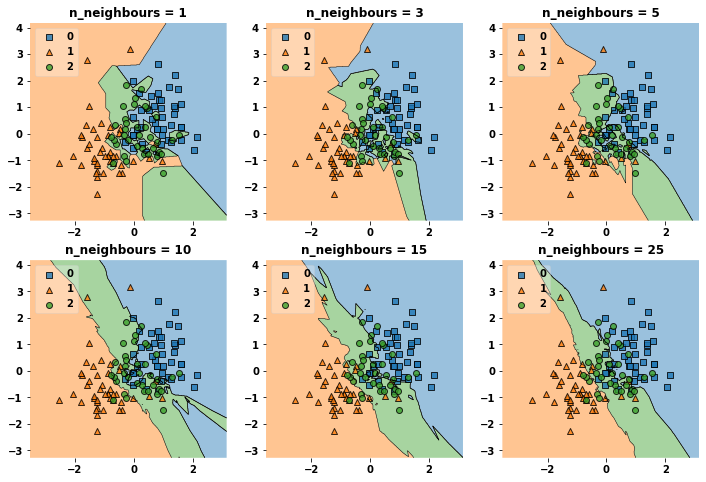

In [176]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(12,8))

labels = ['n_neighbours = {}'.format(i) for i in [1,3,5,10,15,25]]
#labels = ['n_neighbours = {}'.format(i) for i in range(1,7)]

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         grid):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Судя по процентам, качественнее всех работает модель с 5 соседями, результат которой - 0.77 верных прогнозов на тренировочной выборке и 0.7 на тестовой выборке. Остальные модели показывают сравнимый результат на тренировочной выборке, но на тестовой уже видно, что модели с менее 5 соседями слишком подогнаны под тренировочную выборку - это же можно проследить и по графикам. Модели 1 и 2 строят поля, состоящие из нескольких отдельных несвязанных зон - практически под каждую контретную точку есть своя зона. Модели с более чем 5 соседями, наоборот, слишком апроксимируют, и многие точки не попадают в нужную поверхность.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

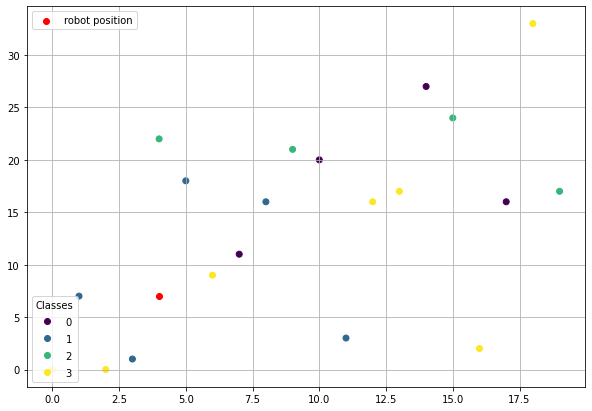

In [5]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import random

In [19]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position.reshape(1,-1)
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        initial_position = self.trajectory[-1]
        point_class = self.knn.predict(initial_position.reshape(1, -1))
        
        def step_right(init_pos):
            new_pos = (init_pos[0] + 1, init_pos[1])
            return new_pos

        def step_pred(init_pos):
            new_pos = (init_pos[0] + self.mapping[int(point_class)][0], init_pos[1] + self.mapping[int(point_class)][1])
            return new_pos
        
        new = random.choices([step_right(initial_position), step_pred(initial_position)], weights=[20, 80])
        
        self.trajectory = np.vstack((self.trajectory, np.array(new)))

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [20]:
import numpy as np

def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

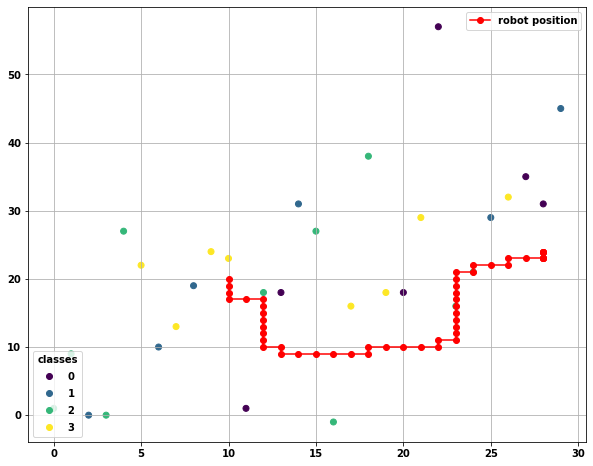

In [21]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

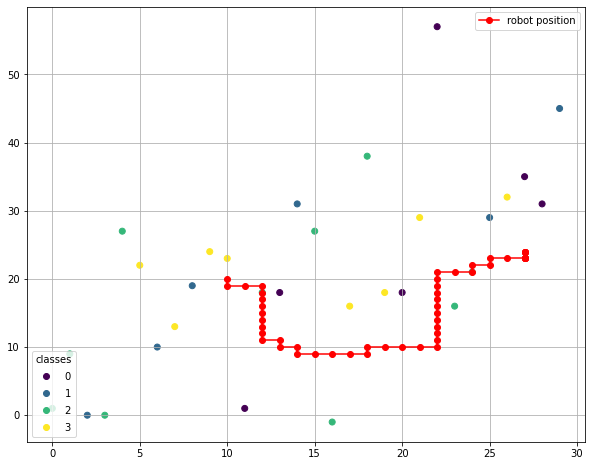

In [24]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

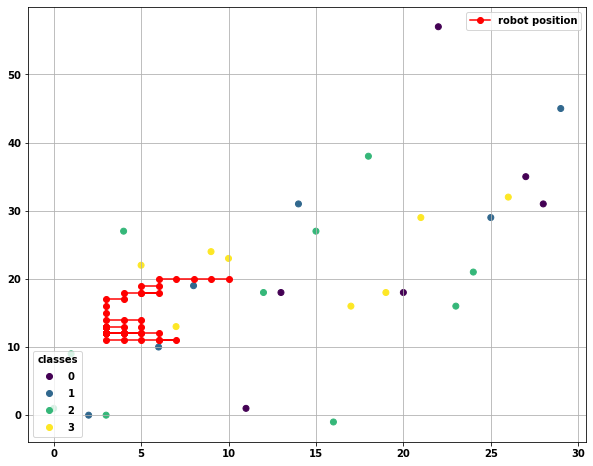

In [30]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

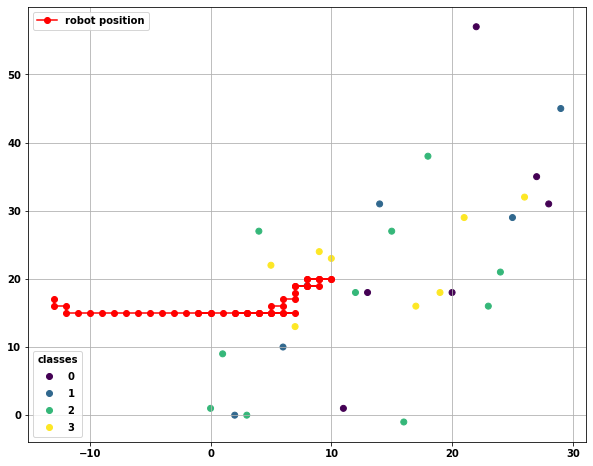

In [23]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

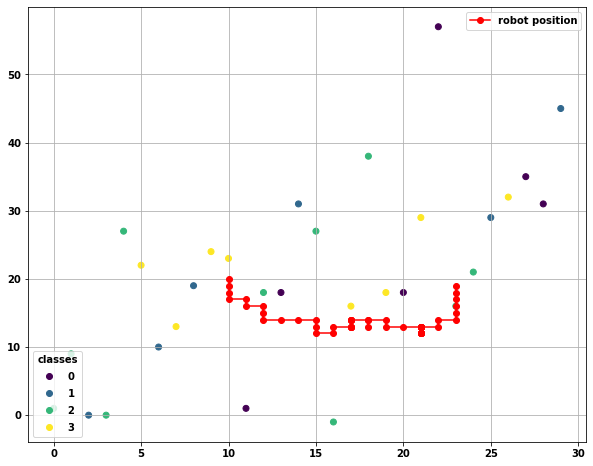

In [31]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

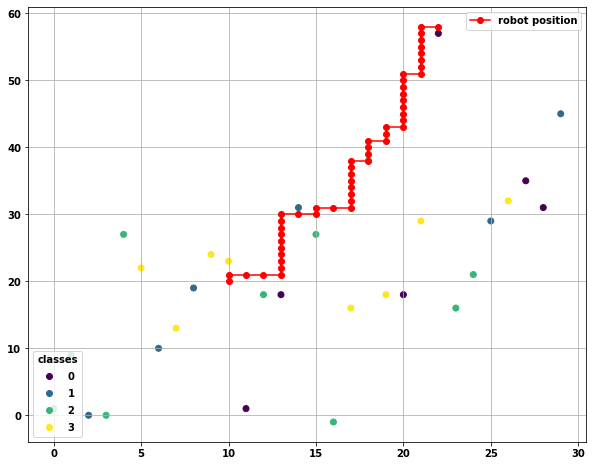

In [33]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

- Когда очень мало соседей - робот будет повторять одно и то же движение несколько раз, поскольку так как точки разбросаны на достаточно большом растоянии, в ближайшем окружении будут одни и те же ближайшие точки.
- От 5 до 10 соседей в целом неплохо
- При количестве соседей, стремящемся к числу точек, в предсказание модели все время будет одно и то же, поскольку в ближайшем окружении точки будут почти все сразу. Разнообразие в движениях будет обусловлено только вероятностью пойти не по предсказанию.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [159]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [160]:
data.isna().sum() # пропущенных значений нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [161]:
data.shape

(53940, 11)

In [162]:
data['Unnamed: 0'].unique() # просто столбец, где продублированы индексы

array([    1,     2,     3, ..., 53938, 53939, 53940], dtype=int64)

In [163]:
data = data.drop(columns=['Unnamed: 0'])
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [165]:
numeric = ['carat', 'depth', 'table', 'x', 'y', 'z']
for prisnak in numeric:
    print(prisnak, np.corrcoef(data[prisnak], data['price'])[0][1], sep='\t')

carat	0.9215913011934779
depth	-0.01064740458414298
table	0.127133902121742
x	0.8844351610161277
y	0.8654208978641873
z	0.8612494438514481


In [172]:
matrix = np.zeros((7,7)).tolist()
numeric = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
for row in range(7):
    for column in range(7):
        matrix[row][column] = round(np.corrcoef(data[numeric[row]], data[numeric[column]])[0][1], 3)
matrix

[[1.0, 0.028, 0.182, 0.975, 0.952, 0.953, 0.922],
 [0.028, 1.0, -0.296, -0.025, -0.029, 0.095, -0.011],
 [0.182, -0.296, 1.0, 0.195, 0.184, 0.151, 0.127],
 [0.975, -0.025, 0.195, 1.0, 0.975, 0.971, 0.884],
 [0.952, -0.029, 0.184, 0.975, 1.0, 0.952, 0.865],
 [0.953, 0.095, 0.151, 0.971, 0.952, 1.0, 0.861],
 [0.922, -0.011, 0.127, 0.884, 0.865, 0.861, 1.0]]

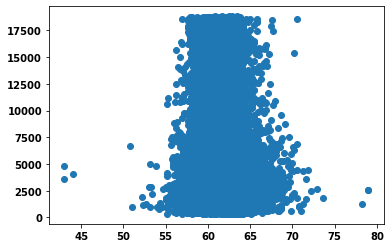

In [144]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(data.depth, data.price)
# видно, что корреляции нет

Больше всего с ценой коррелируют размеры алмаза (x, y, z) и его вес в каратах 

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [145]:
for prisnak in ['cut', 'color', 'clarity']:
    print(prisnak, data[prisnak].unique(), sep='\t')

cut	['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color	['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity	['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Здесь все признаки - это разная степень качественности:
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Значит, логичнее было бы закодировать все признаки численно, условно от 1 до N, где n - хорошо, а 1 - плохо. 

In [146]:
data = pd.get_dummies(data, drop_first=True)
print(data.shape)
data.head()

(53940, 24)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [147]:
from sklearn.model_selection import train_test_split

y = data['price']
X = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.head()
col = X_train.columns

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(data = scaler.fit_transform(X_train))
X_test = pd.DataFrame(data = scaler.fit_transform(X_test))

In [151]:
X_train.columns = col
X_test.columns = col

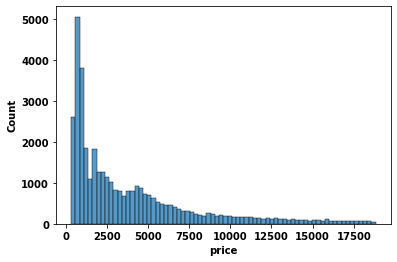

In [152]:
import seaborn as sns
sns.histplot(y_train)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [153]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)

In [154]:
mse = MSE(y=y_train, y_pred=predict_train)
print("The Mean Square Error is: " , mse)

The Mean Square Error is:  1268454.9559615501


In [155]:
mse = MSE(y=y_test, y_pred=predict_test)
print("The Mean Square Error is: " , mse)

The Mean Square Error is:  1314517.442355111


Выглядит страшно, но эти ошибки означают, что в среднем модешь ошибается на 1147 долларов на тестовой выборке и на 1126 долларов на тренировочной выборке.

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [156]:
for i in range(23):
    print(X_train.columns[i], lr.coef_[i], sep='\t')

carat	5268.33484546887
depth	-73.11130000448087
table	-67.58876012247569
x	-959.0019793065305
y	80.66323538554205
z	-238.03861299902826
cut_Good	180.15573710620157
cut_Ideal	421.77166368469227
cut_Premium	345.46452229400455
cut_Very Good	319.33315673537146
color_E	-78.91526549378288
color_F	-102.4434437994166
color_G	-190.84186213305242
color_H	-349.27948990004694
color_I	-431.9443879298491
color_J	-513.6354367058891
clarity_IF	965.635625449771
clarity_SI1	1586.6809227027825
clarity_SI2	1032.5511080323986
clarity_VS1	1651.298291839008
clarity_VS2	1808.1770500561418
clarity_VVS1	1274.4152671001452
clarity_VVS2	1453.3752945185431


Вещественные переменные - первые 6, из них самые выбивающиеся - это 'carat' и 'x' 

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [182]:
# L1

from sklearn import linear_model

lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train, y_train)


In [176]:
for i in range(23):
    print(X_train.columns[i], lasso.coef_[i], sep='\t')

carat	4789.301379869342
depth	-86.41865744610034
table	-76.38421181557672
x	-488.89810043157576
y	-0.0
z	-194.28263010471065
cut_Good	55.05784633875222
cut_Ideal	216.79082209887838
cut_Premium	157.06549182003934
cut_Very Good	149.1756221921316
color_E	-7.884082677422385
color_F	-36.14771625311752
color_G	-112.15611528175297
color_H	-275.5727889073622
color_I	-360.54370149822887
color_J	-453.0573401164266
clarity_IF	633.6238049949307
clarity_SI1	816.2359149087439
clarity_SI2	363.210390563912
clarity_VS1	1001.1873786153893
clarity_VS2	1053.3165778625494
clarity_VVS1	815.1964985756644
clarity_VVS2	924.7002072967725


In [183]:
np.linalg.norm(lasso.coef_)

5346.090230121044

In [184]:
# L2

from sklearn.linear_model import Ridge

ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)


In [185]:
np.linalg.norm(ridge.coef_)

6564.347717435942

In [177]:
for i in range(23):
    print(X_train.columns[i], ridge.coef_[i], sep='\t')

carat	5226.768146496779
depth	-79.69844482366403
table	-68.75169954059808
x	-883.1685315283546
y	0.0
z	-196.3972101095686
cut_Good	168.81027536285887
cut_Ideal	402.8564145739641
cut_Premium	327.27274842472076
cut_Very Good	304.1048507575808
color_E	-71.70629411978717
color_F	-95.7112500679341
color_G	-182.90837219793664
color_H	-341.9316733989904
color_I	-424.8319694087283
color_J	-507.6313022769859
clarity_IF	932.2424319946953
clarity_SI1	1509.4022880784505
clarity_SI2	965.3369527277073
clarity_VS1	1586.1508017714325
clarity_VS2	1732.3845123079225
clarity_VVS1	1228.1864718746049
clarity_VVS2	1400.2493907020582


В обоих случаях вес при 'y' занулился, значит эта переменная сильно коррелировала с другой, и в итоговой модели лишь дублировала ее значения. При этом 'carat', 'x' и 'z' как были с большими весами, так и остались, значит, их вклад в цену бриллианта действительно высок. На самом деле, если плотность бриллиантов одинаковая, то вес в каратах должен линейно зависеть от объема и было бы логично вместо переменных xyz и карат, ввести только объем. Однако, нельзя утверждать, что цена не может зависеть от формы (например, что сферические алмазы дороже удлиненных), поэтому эти параметры тоже могу быть нужны.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [179]:
lasso_norm = []
ridge_norm = []

for a in [0.1, 1, 10, 100, 200]:
    
    # обучаем lasso
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_norm.append(np.linalg.norm(lasso.coef_))
    
    # обучаем ridge
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_norm.append(np.linalg.norm(ridge.coef_))


In [180]:
lasso_norm

[6622.347890309592,
 6496.721036627037,
 5346.090230121044,
 3844.5750308244296,
 3558.8214449838333]

In [187]:
ridge_norm

[6636.589561422944,
 6629.894491316956,
 6564.347717435942,
 6015.400027073145,
 5554.069324459427]

In [193]:
df = pd.DataFrame({'lasso':lasso_norm, 'ridge':ridge_norm}, index=[0.1, 1, 10, 100, 200])

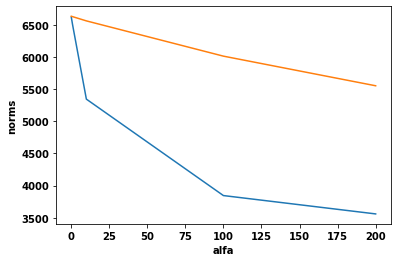

In [202]:
plt.plot(df)
plt.xlabel("alfa")
plt.ylabel("norms")
plt.show()

Lasso уменьшает веса агрессивнее, судя по нормам. Так происходит, потому что в ней есть квадрат, который сильно увеличивает вклад и так больших чисел (как в mse) и потом карает за это. Его используют чаще, поскольку для отбора признаков важно знать именно крайние значения весов - самые большие и самые маленькие. Ridge регуляризация может корректировать веса, но не настолько радикально.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [204]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, random_state=10).fit(X_train, y_train)
lasso_cv.alphas_

C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093147008.3085938, tolerance: 47234925.03802861
  tol, rng, random, positive)


array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [208]:
sr = []
for lis in lasso_cv.mse_path_:
    sr.append(round(np.mean(lis),2))
sr

[2132184.24, 1765762.95, 1333979.67, 1272930.64, 1272749.16]

In [209]:
max(sr)

2132184.24

Максимальное среднее значение ошибка принимает при a = 200. 

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [213]:
lasso_final = linear_model.Lasso(alpha=200)
lasso_final.fit(X_train, y_train)
pd.DataFrame({'coef':lasso_final.coef_}, index=col)

,coef
carat,3547.551129
depth,-0.000000
table,-0.000000
x,0.000000
y,0.000000
z,0.000000
cut_Good,-0.000000
cut_Ideal,0.000000
cut_Premium,-0.000000
cut_Very Good,-0.000000


Самыми важными оказались следующие признаки: вес в каратах, цвет J (самый плохой), прозрачность бриллианта - SI1, SI2 и VVS2.
- Вес в каратах: с самого начала ноутбука видно, этот признак больше всех коррелирует с ценой бриллианта. Во всех моделях, даже с учетом регуляризации, вес при этом признаке оставался наибольшим. Также, как было замечено ранее, остальные вещественные признаки, описывающие размер бриллианта, достаточно сильно коррелировали с весом, поэтому при регуляризации их веса ожидаемо занулились.
- Занулились все веса у признаков огранки. Вероятно, это случилось потому, что в датафрейме представлены разные степени хорошей огранки (от приемлемой до идеальной). То есть этот параметр не сильно разнится от бриллианта к бриллианту, то есть не может быть сильно связан с ценами.
- Цвет: Возможно, это случилось по аналогичной причине, то есть на все цвета выше J примерно одинаковый спрос - будь это самый лучший или просто хороший цвет. 
- Прозрачность: ясно, что прозрачность слабо влияет на цену, поскольку, даже если сравнить среднюю цену у самых плохих (I1) и самых качественных (IF) по прозрачности бриллиантов - она будет больше у плохих (см. ниже).

C:\Users\Anna\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


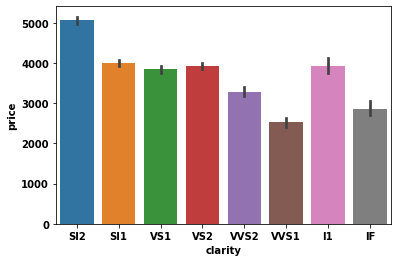

In [219]:
sns.barplot(data['clarity'], data['price'])

In [221]:
np.mean(data[data['clarity'] == 'IF']['price'])

2864.839106145251

In [222]:
np.mean(data[data['clarity'] == 'I1']['price'])

3924.1686909581645

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [223]:
lf_prediction_train = lasso_final.predict(X_train)
lf_prediction_test = lasso_final.predict(X_test)

In [224]:
mse = MSE(y=y_train, y_pred=lf_prediction_train)
print("The Mean Square Error is: " , mse)

The Mean Square Error is:  2131365.35598259


In [225]:
mse = MSE(y=y_test, y_pred=lf_prediction_test)
print("The Mean Square Error is: " , mse)

The Mean Square Error is:  2256868.9307932826


Обычная регрессия обучается лучше, возможные причины:
+ возможно, какие-то параметры работают в комплексе (например, их произведение может влиять), а лассо их занулила
+ возможно, для каких-то признаков больше дисперсия или разброс в крайних квартилях, что влияет на оценку обычной модели, а лассо сглаживает такие моменты и следовательно, подстраивается больше под участки без разбросов